In [3]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataframe
df = pd.read_csv("data/sensor_data.csv")
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [5]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [6]:
df.shape

(4204799, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   timestamp                                           object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64
 2   Auxiliary Boilers Feed Water Header Pressure        float64
 3   Heat Recovery System Header Mass Flow               float64
 4   Heat Recovery System Header Mass Flow.1             float64
 5   Heat Recovery System Header Pressure                float64
 6   Heat Recovery System Header Pressure.1              float64
 7   Lube Oil Cooler Outlet Temperature                  float64
 8   Lube Oil Tank Temperature                           float64
 9   Motor Current Phase A                               float64
 10  Motor Current Phase B                               float64
 11  Motor Current Phase C                

#### Corrections to be made:
1) Convert timestamp to_date_time format.

In [8]:
# making a backup for the original dataframe
df_backup = df.copy()

In [9]:
df.describe()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
count,4.204622e+06,4.204615e+06,4.204611e+06,4.204633e+06,4.204546e+06,4.204546e+06,4.204109e+06,4.204537e+06,4.203289e+06,4.203330e+06,...,4.202745e+06,4.203514e+06,4.203988e+06,3.588413e+06,4.204589e+06,4.204365e+06,4.204528e+06,4.204388e+06,4.204391e+06,4.204459e+06
mean,1.266100e+03,1.266099e+03,3.043744e+05,3.064900e+05,1.691055e+03,1.694281e+03,7.848413e+01,8.168171e+01,1.303664e+02,1.303795e+02,...,1.309147e+02,1.357472e+02,7.751918e+00,3.589018e+03,2.411352e+01,1.647793e+01,2.957083e-01,2.083220e+02,9.889467e+01,9.053588e+01
std,2.055467e+02,2.055080e+02,7.554485e+04,7.663380e+04,2.698646e+02,2.708993e+02,1.475980e+01,1.524811e+01,5.424327e+01,5.425204e+01,...,2.586100e+01,2.711077e+01,2.928067e+00,1.957672e+01,3.208042e+00,2.449078e+00,1.655886e-01,4.752459e+01,1.560383e+01,1.452899e+01
min,-7.636613e+00,-6.771245e+00,0.000000e+00,0.000000e+00,1.704244e+01,1.289393e+01,3.243229e+01,3.814524e+01,0.000000e+00,0.000000e+00,...,4.123110e+01,4.357593e+01,0.000000e+00,0.000000e+00,-2.500569e+00,-6.963648e-01,-6.308638e-02,5.435489e+01,3.861586e+01,3.843626e+01
25%,1.292432e+03,1.292884e+03,3.173663e+05,3.201534e+05,1.724833e+03,1.728389e+03,6.848010e+01,7.188632e+01,1.480000e+02,1.480000e+02,...,1.328644e+02,1.408564e+02,7.699702e+00,3.588703e+03,2.429598e+01,1.669791e+01,2.961907e-01,2.265833e+02,9.038488e+01,8.072034e+01
50%,1.299897e+03,1.299920e+03,3.242248e+05,3.280382e+05,1.747786e+03,1.751455e+03,7.912177e+01,8.141112e+01,1.509625e+02,1.509688e+02,...,1.392578e+02,1.449702e+02,8.365638e+00,3.588998e+03,2.458638e+01,1.685027e+01,3.239726e-01,2.270389e+02,1.005230e+02,9.089253e+01
75%,1.306910e+03,1.306519e+03,3.279393e+05,3.321559e+05,1.758330e+03,1.761804e+03,8.939349e+01,9.138443e+01,1.530000e+02,1.530000e+02,...,1.452104e+02,1.494180e+02,9.625259e+00,3.589745e+03,2.480866e+01,1.701697e+01,3.587853e-01,2.274158e+02,1.101675e+02,1.015284e+02
max,1.522039e+03,1.485783e+03,4.355689e+05,4.355188e+05,1.951435e+03,1.946133e+03,1.139856e+02,1.203881e+02,1.462750e+03,1.468594e+03,...,1.584870e+02,1.604716e+02,2.541097e+01,3.626543e+03,3.666489e+01,2.815888e+01,1.111553e+00,2.494483e+02,1.315183e+02,1.240305e+02


In [10]:
# Checking for outliers
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,-7.636613,-6.771245,0.00000,0.000000,17.042439,12.893926,32.432285,38.145237,0.000000,0.000000,...,41.231098,43.575928,0.000000,0.000000,-2.500569,-0.696365,-0.063086,54.354889,38.615856,38.436256
0.01,0.017247,0.014358,0.00000,0.000000,22.049307,18.942179,45.421556,48.752743,0.000000,0.000000,...,50.494530,50.530319,0.869764,3586.954102,3.695837,0.404995,-0.062133,60.796913,49.783033,49.292685
0.25,1292.431641,1292.884399,317366.34380,320153.406300,1724.833496,1728.388550,68.480103,71.886322,148.000000,148.000000,...,132.864380,140.856403,7.699702,3588.703369,24.295977,16.697914,0.296191,226.583298,90.384876,80.720345
0.50,1299.896851,1299.920410,324224.84380,328038.156300,1747.786377,1751.455200,79.121765,81.411118,150.962509,150.968842,...,139.257767,144.970207,8.365638,3588.998291,24.586378,16.850267,0.323973,227.038925,100.523041,90.892532
0.75,1306.909912,1306.519287,327939.31250,332155.906300,1758.330414,1761.804443,89.393486,91.384430,153.000000,153.000000,...,145.210449,149.418045,9.625259,3589.745361,24.808659,17.016968,0.358785,227.415756,110.167503,101.528423
0.90,1314.601563,1313.866699,330888.09380,334746.937500,1767.684204,1770.961426,97.782529,103.434944,159.316519,159.315445,...,149.784467,153.119615,10.372310,3589.998047,25.344891,17.574092,0.440782,227.764877,117.527466,109.543259
0.95,1320.676270,1319.778809,332586.84380,336268.218800,1777.020965,1779.747437,101.889130,107.933849,164.313885,164.347826,...,151.534512,154.602142,10.634660,3590.928467,25.877775,17.798008,0.519426,227.959534,120.664101,112.920036
0.99,1333.603805,1332.684326,335833.18438,339499.677516,1805.929022,1807.089245,108.013202,113.274455,173.333234,173.347934,...,154.377779,157.035444,11.025861,3591.557617,26.294129,18.110916,0.672816,228.347612,125.799154,118.212357
1.00,1522.038940,1485.783203,435568.93750,435518.750000,1951.434692,1946.132935,113.985558,120.388084,1462.750244,1468.593506,...,158.487000,160.471634,25.410971,3626.543457,36.664894,28.158882,1.111553,249.448349,131.518341,124.030472


Some outliers are present, visualize them for the necessary columns.

In [11]:
df.corr()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
Auxiliary Boilers A/B Feed Water Header Pressure 2,1.000000,0.999847,0.659041,0.573490,0.951688,0.952060,0.079021,-0.057577,0.343692,0.343564,...,0.335184,0.347563,0.332787,0.006984,0.679681,0.674085,0.296822,0.396737,0.262114,0.200279
Auxiliary Boilers Feed Water Header Pressure,0.999847,1.000000,0.659159,0.573596,0.951909,0.952280,0.079045,-0.057578,0.343699,0.343573,...,0.335223,0.347603,0.332830,0.007152,0.679862,0.674263,0.296786,0.396780,0.262154,0.200316
Heat Recovery System Header Mass Flow,0.659041,0.659159,1.000000,0.763484,0.597223,0.600359,0.021086,-0.066033,0.233147,0.233319,...,0.214283,0.225871,0.226623,-0.002586,0.448991,0.449840,0.210106,0.289067,0.151722,0.106598
Heat Recovery System Header Mass Flow.1,0.573490,0.573596,0.763484,1.000000,0.506790,0.508232,0.071475,-0.002308,0.197971,0.198035,...,0.192106,0.197166,0.175070,-0.004464,0.388269,0.389191,0.190991,0.244466,0.163209,0.135301
Heat Recovery System Header Pressure,0.951688,0.951909,0.597223,0.506790,1.000000,0.999980,0.100781,-0.035149,0.340804,0.340721,...,0.350109,0.362810,0.342516,0.018918,0.684913,0.677139,0.233659,0.399839,0.285009,0.222806
Heat Recovery System Header Pressure.1,0.952060,0.952280,0.600359,0.508232,0.999980,1.000000,0.100631,-0.035325,0.340996,0.340912,...,0.350190,0.362900,0.342624,0.018926,0.685189,0.677410,0.234036,0.400116,0.284962,0.222719
Lube Oil Cooler Outlet Temperature,0.079021,0.079045,0.021086,0.071475,0.100781,0.100631,1.000000,0.923592,0.174912,0.175148,...,0.439362,0.383243,-0.003223,-0.010598,0.152373,0.197482,0.139524,0.162373,0.825147,0.932207
Lube Oil Tank Temperature,-0.057577,-0.057578,-0.066033,-0.002308,-0.035149,-0.035325,0.923592,1.000000,0.168806,0.169054,...,0.413920,0.353378,-0.008993,-0.011133,-0.069207,-0.038374,0.135218,0.166658,0.769420,0.870058
Motor Current Phase A,0.343692,0.343699,0.233147,0.197971,0.340804,0.340996,0.174912,0.168806,1.000000,0.999914,...,0.943334,0.961243,0.938255,0.121719,0.265303,0.280764,0.924930,0.929352,0.684769,0.505346
Motor Current Phase B,0.343564,0.343573,0.233319,0.198035,0.340721,0.340912,0.175148,0.169054,0.999914,1.000000,...,0.943441,0.961369,0.938350,0.133220,0.265243,0.280694,0.924771,0.929389,0.685029,0.505607


In [13]:
# Convert Timestamp todatetime format

from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4204799 entries, 0 to 4204798
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
4204799 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.1 MB


In [14]:
# Checking for null values
df.isnull().sum()/len(df)*100

timestamp                                              0.000000
Auxiliary Boilers A/B Feed Water Header Pressure 2     0.004209
Auxiliary Boilers Feed Water Header Pressure           0.004376
Heat Recovery System Header Mass Flow                  0.004471
Heat Recovery System Header Mass Flow.1                0.003948
Heat Recovery System Header Pressure                   0.006017
Heat Recovery System Header Pressure.1                 0.006017
Lube Oil Cooler Outlet Temperature                     0.016410
Lube Oil Tank Temperature                              0.006231
Motor Current Phase A                                  0.035911
Motor Current Phase B                                  0.034936
Motor Current Phase C                                  0.034223
Motor Input Power                                     73.629346
Motor Power Factor                                    73.629489
Motor Voltage                                          0.031916
Pump Discharge Pressure                 

In [15]:
# Drop the columns with more than 60% missing values: i.e drop Motor Input Power and Motor Power Factor 

df.drop(['Motor Power Factor','Motor Input Power'], axis=1, inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [16]:
# dealing with the nulls by ffill
df = df.fillna(method='ffill')
df.isnull().sum()

timestamp                                             0
Auxiliary Boilers A/B Feed Water Header Pressure 2    0
Auxiliary Boilers Feed Water Header Pressure          0
Heat Recovery System Header Mass Flow                 0
Heat Recovery System Header Mass Flow.1               0
Heat Recovery System Header Pressure                  0
Heat Recovery System Header Pressure.1                0
Lube Oil Cooler Outlet Temperature                    0
Lube Oil Tank Temperature                             0
Motor Current Phase A                                 0
Motor Current Phase B                                 0
Motor Current Phase C                                 0
Motor Voltage                                         0
Pump Discharge Pressure                               0
Pump Discharge Volumetric Flow                        0
Pump Journal 1 Bearing Temperature                    0
Pump Journal 2 Bearing Temperature                    0
Pump Radial Bearing Vibration                   

In [40]:
#cols=df1.columns
# df.loc[:, df1.columns!='timestamp'].head()


,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,146.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,146.613678,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,146.301178,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,147.000000,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [17]:
# Handling outliers
cols = df.loc[:, df.columns!='timestamp']

Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

df = df[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,1270.716675,1272.433228,301506.406300,302150.0938,1674.669678,1678.322266,42.700100,42.642410,140.506210,140.506210,...,114.421127,128.028442,6.010884,3585.851318,23.527012,16.219303,0.202349,225.334747,80.289261,66.196556
0.01,1275.880483,1277.212769,304935.176268,306942.1425,1687.648838,1691.086904,50.532689,52.026095,146.356415,147.000000,...,128.599017,138.047098,7.320531,3587.319580,23.845551,16.395611,0.271491,226.134338,82.844881,69.868530
0.25,1293.449463,1293.871826,319423.312500,322314.0625,1739.401123,1743.067139,70.052597,72.883896,149.000000,149.000000,...,136.517807,143.270233,7.994415,3588.897949,24.368921,16.737703,0.308197,226.868347,95.884918,85.161644
0.50,1300.118652,1300.134644,324693.718800,329430.7188,1750.540527,1754.183838,80.158211,82.902161,151.000000,151.000000,...,140.763962,146.263290,8.623632,3588.998291,24.583567,16.846758,0.325561,227.147598,103.103737,93.564026
0.75,1306.633789,1306.243530,327988.062500,332679.0000,1758.971558,1762.443848,91.649948,94.898628,152.000000,152.000000,...,146.714691,150.813355,9.733167,3589.756104,24.737146,16.960070,0.347359,227.473496,112.506897,104.036057
0.90,1312.932617,1312.183350,330740.156300,334986.9063,1765.841675,1769.233960,99.285834,105.209477,154.824524,154.658630,...,150.393799,153.715677,10.438220,3589.990234,24.888190,17.075033,0.379184,227.780289,118.756975,110.871672
0.95,1316.951294,1316.008789,332409.406300,336386.7813,1769.363281,1772.715454,103.124294,109.199583,156.000000,156.000000,...,151.956009,155.024976,10.665772,3590.899902,24.997402,17.151105,0.403120,227.950073,121.661510,113.933926
0.99,1323.790815,1322.600752,335461.002532,339463.7100,1775.993896,1779.176270,108.669316,114.194157,158.381743,158.347595,...,154.689821,157.297628,11.052633,3590.981934,25.261802,17.332919,0.438285,228.288513,126.297592,118.796326
1.00,1328.626343,1326.970337,343743.000000,350127.3750,1808.522705,1811.830322,113.985558,120.388084,160.038834,160.021790,...,158.171402,160.471634,11.981857,3591.785400,25.577740,17.495638,0.452678,228.664520,131.518341,124.030472


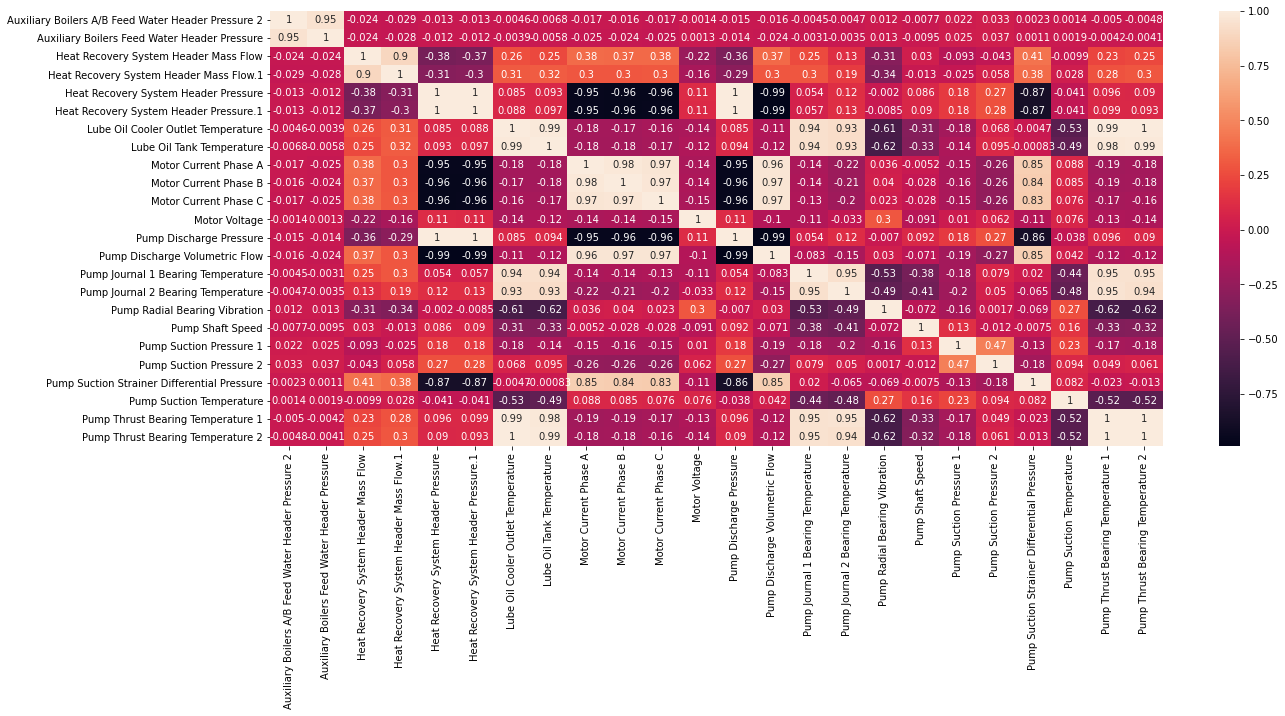

In [19]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:>

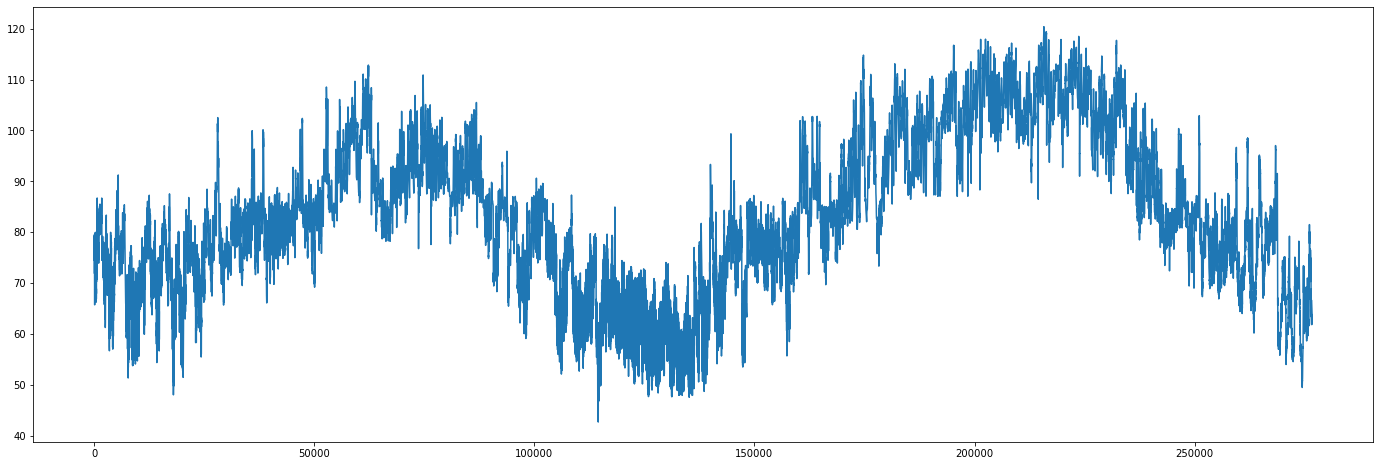

In [119]:
df.loc[::10, 'Lube Oil Tank Temperature'].reset_index(drop=True).plot(figsize=[24,8])

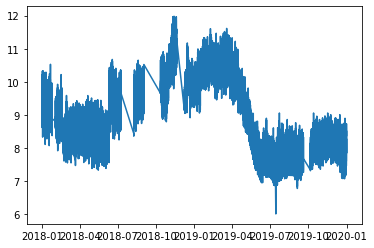

In [82]:
plt.plot(df.timestamp,y)

In [83]:
# # First do train-test- split
# from sklearn.model_selection import train_test_split

In [84]:
# X.shape, y.shape

((2765965, 24), (2765965,))

In [20]:
!pip install mlxtend

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score

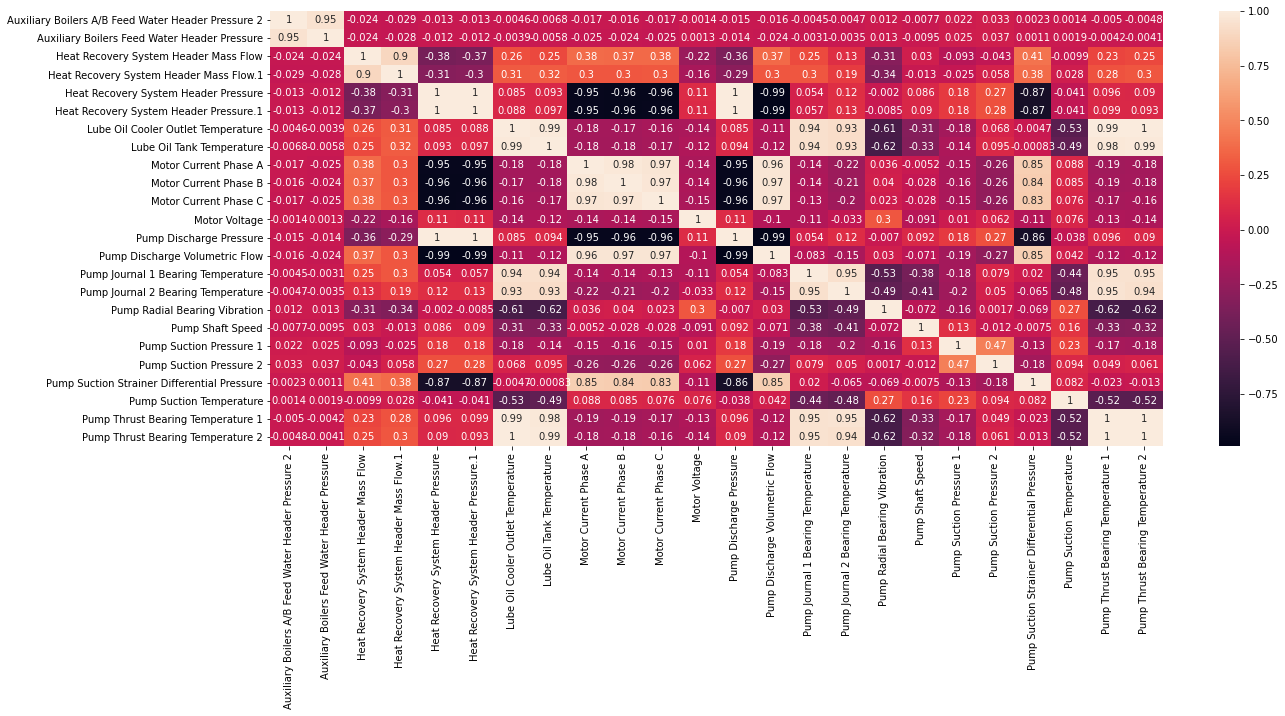

In [22]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
# Dropping the highly correlated columns

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
print(to_drop)

['Heat Recovery System Header Pressure.1', 'Lube Oil Tank Temperature', 'Motor Current Phase A', 'Motor Current Phase B', 'Motor Current Phase C', 'Pump Discharge Pressure', 'Pump Discharge Volumetric Flow', 'Pump Thrust Bearing Temperature 1', 'Pump Thrust Bearing Temperature 2']


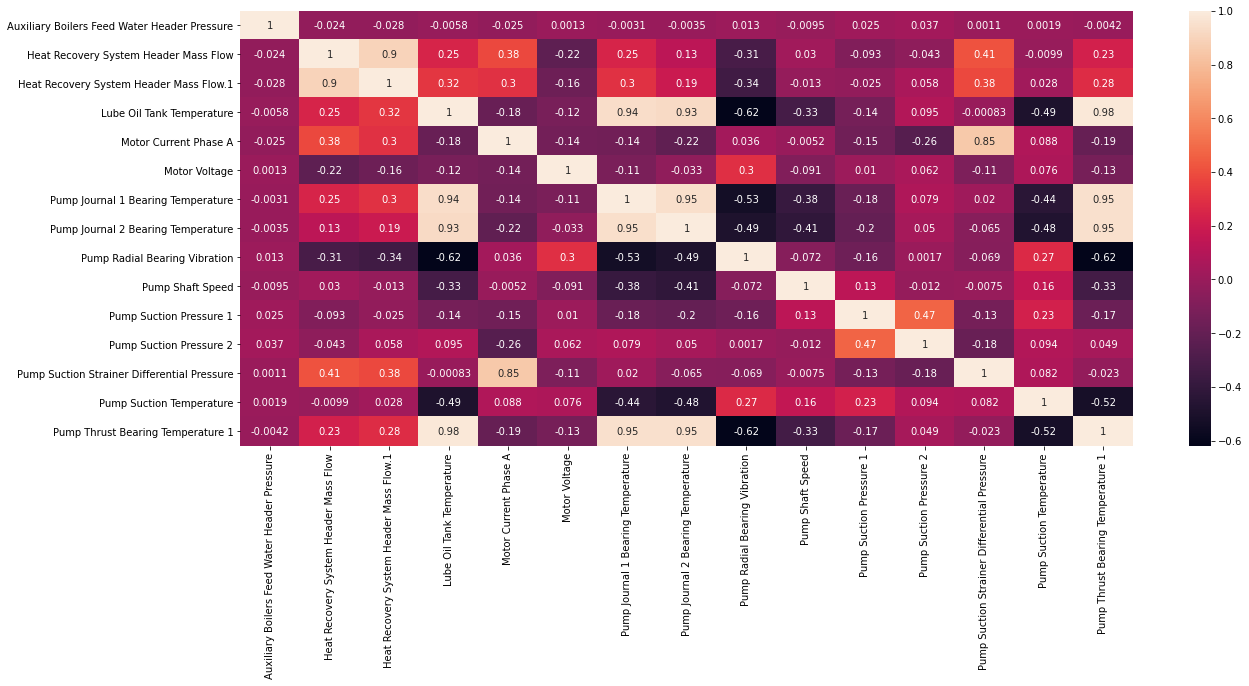

In [24]:
df1 = df.drop(['Auxiliary Boilers A/B Feed Water Header Pressure 2', 'Heat Recovery System Header Pressure.1','Lube Oil Cooler Outlet Temperature',
                'Motor Current Phase C', 'Motor Current Phase B', 'Pump Discharge Pressure','Pump Thrust Bearing Temperature 2', 'Pump Discharge Volumetric Flow',
                'Heat Recovery System Header Pressure'], axis=1)
plt.figure(figsize=[20,8])
sns.heatmap(df1.corr(), annot=True)
plt.show()                
                

In [9]:
# import gc
# del df
# gc.collect()

15

In [26]:
# Defining X and y variables
X = df1.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df1['Pump Radial Bearing Vibration']

In [27]:
X.head()

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
1,1299.925171,303027.7500,303782.2813,76.948776,145.000000,4235.000000,137.133484,144.299057,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756
2,1294.646606,301878.9688,303518.4375,76.932243,146.306839,4236.454590,137.131317,144.298004,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716
3,1299.988770,302023.0625,303576.3750,76.912827,146.000000,4232.772461,137.129150,144.296936,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683
4,1300.749023,301972.0625,303999.5313,76.892960,146.305389,4240.088379,137.126968,144.295883,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650
5,1299.165527,302555.0625,303541.2500,76.873093,146.000000,4231.694824,137.124802,144.294830,3589.284180,25.003630,16.883806,0.274055,226.740112,98.070610


In [139]:
# First do train-test- split
from sklearn.model_selection import train_test_split

In [140]:
X.shape, y.shape

((2765965, 14), (2765965,))

In [141]:
# Using only a sample of data for train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)

In [142]:
# Recsaling the features

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()

In [143]:
# Fitting the scaler to train set so that it can learn the parameters
scaler_x.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_x.transform(X_train)
print(X_train_scaled)

[[0.73232472 0.57363395 0.68374598 ... 0.54891364 0.45127024 0.41675845]
 [0.35478809 0.57905213 0.53133464 ... 0.67815597 0.78933337 0.14286248]
 [0.59977304 0.50684444 0.43041381 ... 0.35533974 0.56838896 0.56928564]
 ...
 [0.22663031 0.68330867 0.67829739 ... 0.42481867 0.63728585 0.41543774]
 [0.36276341 0.64583263 0.68104345 ... 0.47664766 0.54998462 0.76488115]
 [0.48718982 0.26874834 0.327688   ... 0.486051   0.61192238 0.14367675]]


In [144]:
y_train.values.reshape(-1,1)

array([[11.34401131],
       [ 7.84618902],
       [ 8.51059914],
       ...,
       [ 8.63334274],
       [ 7.55779314],
       [10.8484602 ]])

In [145]:
lr=LinearRegression()


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

normalized_lr = Pipeline([('scaler', MinMaxScaler()), ('Lr', LinearRegression(n_jobs=-1))])

sbs = sfs(normalized_lr, k_features=8, forward=False, floating=False, scoring='r2', cv=3, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    8.4s finished

[2022-07-22 19:07:33] Features: 13/8 -- score: 0.6313921588701219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.7s finished

[2022-07-22 19:07:37] Features: 12/8 -- score: 0.6313552412403132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished

[2022-07-22 19:07:41] Features: 11/8 -- score: 0.6311359878781057[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11

In [147]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sbs = sfs(lr, k_features=8, forward=False, floating=False, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    6.8s finished

[2022-07-22 19:08:03] Features: 13/8 -- score: -0.39559911984251983[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    3.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.6s finished

[2022-07-22 19:08:09] Features: 12/8 -- score: -0.3956387559015822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.7s finished

[2022-07-22 19:08:14] Features: 11/8 -- score: -0.3958740306412841[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False, interaction_only=True)
X_poly_train =  poly.fit_transform(X_train)
len(X_poly_train[0])

# lr=LinearRegression(normalize=True)
# sbs = sfs(lr, k_features=8, forward=False, floating=False, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# sbs = sbs.fit(X_poly_train,y_train)

105

In [149]:
sbs.k_feature_idx_

(2, 5, 7, 8, 9, 10, 12, 13)

In [156]:
sbs.k_feature_names_

('2', '5', '7', '8', '9', '10', '12', '13')

In [157]:
X_train.columns

Index(['Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage',
       'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Shaft Speed',
       'Pump Suction Pressure 1', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

In [151]:
sbs.k_score_

-0.3998545333376026

In [152]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [158]:
X_train_selected_cols = X_train[['Heat Recovery System Header Mass Flow', 'Motor Current Phase A', 
                                'Pump Journal 1 Bearing Temperature', 'Pump Journal 2 Bearing Temperature', 
                                'Pump Shaft Speed','Pump Suction Pressure 1', 'Pump Suction Strainer Differential Pressure', 
                                'Pump Suction Temperature']]
X_train_selected_cols.head()                                

,Heat Recovery System Header Mass Flow,Motor Current Phase A,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature
1820739,325380.5313,151.000000,133.903351,143.323517,3587.930176,24.379684,0.339893,226.842010
4158396,325606.0313,154.978897,128.646149,139.271790,3590.981934,25.093416,0.372205,227.964264
774574,322600.8125,148.361221,143.629623,149.275391,3587.930176,24.376987,0.291496,227.230804
3820154,333230.7500,154.000000,138.599869,142.890228,3588.436035,24.450314,0.392469,227.590408
2874339,325786.3438,149.000000,139.761154,144.030090,3589.990234,24.780685,0.317626,227.604874


In [159]:
pipe = Pipeline([('poly_features',PolynomialFeatures(2, include_bias=False, interaction_only=True)),
                        ('scaler', MinMaxScaler()), 
                        ('Lr', LinearRegression(n_jobs=-1))])

model = pipe.fit(X_train_selected_cols, y_train)


In [160]:
y_train.values

array([11.34401131,  7.84618902,  8.51059914, ...,  8.63334274,
        7.55779314, 10.8484602 ])

In [162]:
y_pred = model.predict(X_train_selected_cols)

In [163]:
regression_results(y_train.values, y_pred)

explained_variance:  0.5712
mean_squared_log_error:  0.0046
r2:  0.5712
MAE:  0.5382
MSE:  0.4602
RMSE:  0.6783


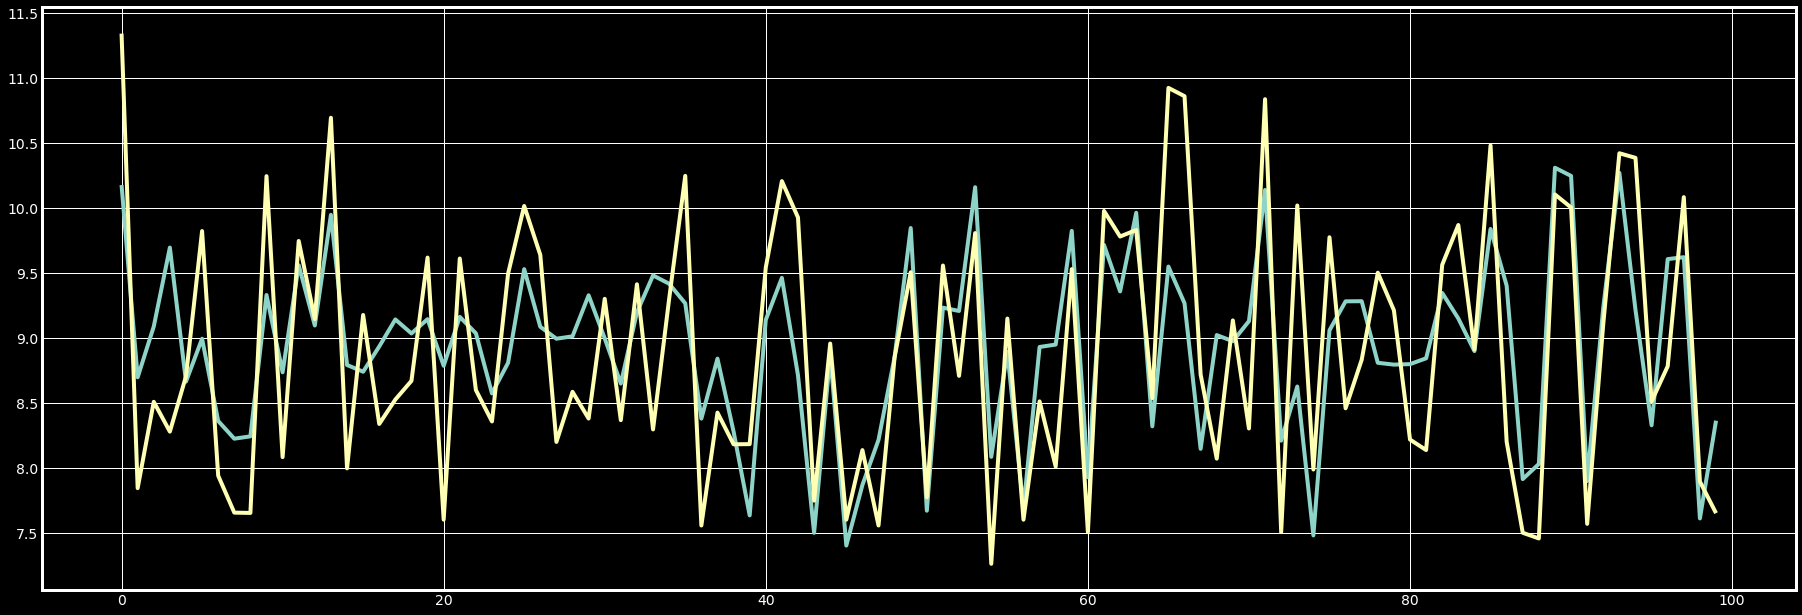

In [164]:
plt.figure(figsize=[28,10])
plt.plot(y_pred[:100])
plt.plot(y_train.values[:100])
plt.show()

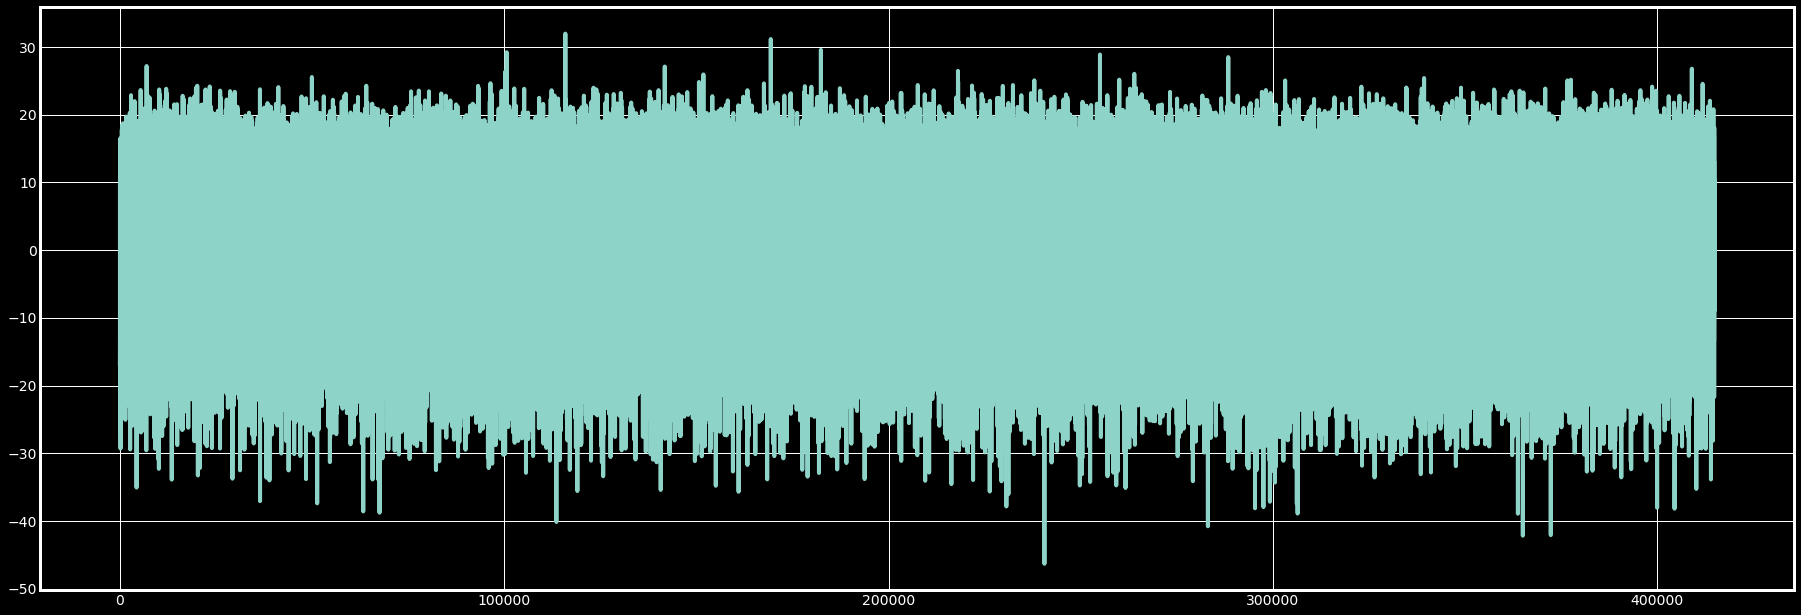

In [165]:
perc_error = (y_train.values - y_pred)/y_train.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.show()

In [54]:
pd.Series(perc_error).quantile([0,0.01,0.25,0.5,0.75,0.9,0.99, 1])
# ser = pd.Series(perc_error)
# ser.quantile()

0.00   -37.217353
0.01   -14.715253
0.25    -4.237495
0.50    -0.291499
0.75     3.628330
0.90     7.031758
0.99    13.621311
1.00    30.760792
dtype: float64

In [53]:
## Importing Ridge regression library
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [54]:
y_pred_ridge = ridge.predict(X_test)

In [55]:
print("slope: %.2f" % ridge.coef_[0])

slope: 0.00


In [56]:
print("Intercept: %.2f" % ridge.intercept_)

Intercept: 905.46


In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_ridge)


0.3955143382753076

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.6288993069445279

In [59]:
print("Rsquared: %.2f" % ridge.score(X_test, y_test))

Rsquared: 0.63


In [62]:
# XGBoost

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgbr = XGBRegressor(verbosity = 0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [63]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.9181579630196199


In [64]:
cv_score = cross_val_score(xgbr, X_train,y_train,cv=4)
print("CV mean Score:", cv_score.mean())

CV mean Score: 0.9104317110483182


In [65]:
y_pred_xgb = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.09452948123065055
RMSE:  0.047264740615325276


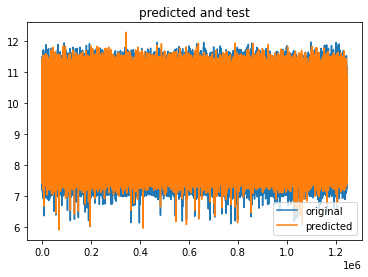

In [70]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label="original")
plt.plot(x_ax, y_pred_xgb, label="predicted")
plt.title("predicted and test")
plt.legend()
plt.show()

In [73]:
import xgboost as xgb

model = xgb.XGBRegressor( 
                    max_depth = 7,
                    min_child_weight = 12,
                    learning_rate = 0.08,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=75
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:7.70590
[1]	validation_0-mae:7.08946
[2]	validation_0-mae:6.52235
[3]	validation_0-mae:6.00060
[4]	validation_0-mae:5.52055
[5]	validation_0-mae:5.07891
[6]	validation_0-mae:4.67264
[7]	validation_0-mae:4.29887
[8]	validation_0-mae:3.95494
[9]	validation_0-mae:3.63850
[10]	validation_0-mae:3.34743
[11]	validation_0-mae:3.07964
[12]	validation_0-mae:2.83327
[13]	validation_0-mae:2.60665
[14]	validation_0-mae:2.39806
[15]	validation_0-mae:2.20620
[16]	validation_0-mae:2.02978
[17]	validation_0-mae:1.86742
[18]	validation_0-mae:1.71806
[19]	validation_0-mae:1.58077
[20]	validation_0-mae:1.45469
[21]	validation_0-mae:1.33902
[22]	validation_0-mae:1.23288
[23]	validation_0-mae:1.13574
[24]	validation_0-mae:1.04674
[25]	validation_0-mae:0.96547
[26]	validation_0-mae:0.89129
[27]	validation_0-mae:0.82386
[28]	validation_0-mae:0.76248
[29]	validation_0-mae:0.70676
[30]	validation_0-mae:0.65642
[31]	validation_0-mae:0.61078
[32]	validation_0-mae:0.56989
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=12,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

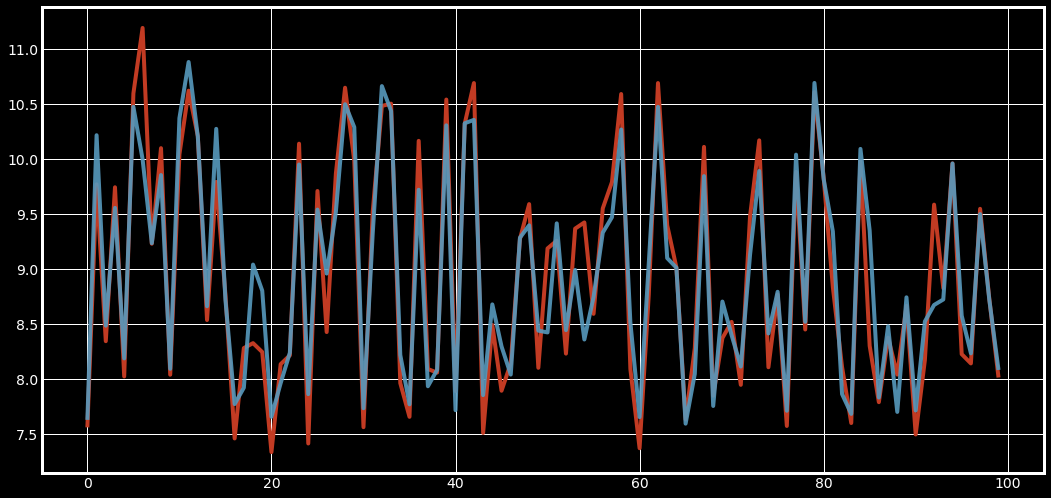

In [75]:
import matplotlib.pyplot as plt

plt.style.use(['fivethirtyeight', 'dark_background'])

# Above not useful, keshav pagal hai usko ache colour chahiye the

plt.figure(figsize=(16,8))
plt.plot(y_test.values[:100], color='#C23B23' )
y_pred_xgb1 = model.predict(X_test)
plt.plot(y_pred_xgb1[:100], color='#579ABE', alpha = 0.9 )
plt.show()

# Feature Selection using xgboost

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [97]:
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)


[0]	validation_0-mae:7.78947
[1]	validation_0-mae:7.24421
[2]	validation_0-mae:6.73716
[3]	validation_0-mae:6.26557
[4]	validation_0-mae:5.82702
[5]	validation_0-mae:5.41917
[6]	validation_0-mae:5.03984
[7]	validation_0-mae:4.68708
[8]	validation_0-mae:4.35902
[9]	validation_0-mae:4.05389
[10]	validation_0-mae:3.77011
[11]	validation_0-mae:3.50621
[12]	validation_0-mae:3.26074
[13]	validation_0-mae:3.03250
[14]	validation_0-mae:2.82021
[15]	validation_0-mae:2.62276
[16]	validation_0-mae:2.43918
[17]	validation_0-mae:2.26842
[18]	validation_0-mae:2.10964
[19]	validation_0-mae:1.96197
[20]	validation_0-mae:1.82468
[21]	validation_0-mae:1.69703
[22]	validation_0-mae:1.57841
[23]	validation_0-mae:1.46818
[24]	validation_0-mae:1.36581
[25]	validation_0-mae:1.27082
[26]	validation_0-mae:1.18271
[27]	validation_0-mae:1.10107
[28]	validation_0-mae:1.02549
[29]	validation_0-mae:0.95553
[30]	validation_0-mae:0.89085
[31]	validation_0-mae:0.83105
[32]	validation_0-mae:0.77592
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance

{'Auxiliary Boilers Feed Water Header Pressure': 1.637915015220642,
 'Heat Recovery System Header Mass Flow': 146.9193572998047,
 'Heat Recovery System Header Mass Flow.1': 156.4212646484375,
 'Lube Oil Tank Temperature': 1797.733642578125,
 'Motor Current Phase A': 205.2472686767578,
 'Motor Voltage': 1253.324951171875,
 'Pump Journal 1 Bearing Temperature': 69.0008316040039,
 'Pump Journal 2 Bearing Temperature': 129.1533660888672,
 'Pump Shaft Speed': 380.51416015625,
 'Pump Suction Pressure 1': 839.4951171875,
 'Pump Suction Pressure 2': 283.8664855957031,
 'Pump Suction Strainer Differential Pressure': 221.2144317626953,
 'Pump Suction Temperature': 72.00148010253906,
 'Pump Thrust Bearing Temperature 1': 552.9733276367188}

In [112]:
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,1797.733643
1,Motor Voltage,1253.324951
2,Pump Suction Pressure 1,839.495117
3,Pump Thrust Bearing Temperature 1,552.973328
4,Pump Shaft Speed,380.514160
5,Pump Suction Pressure 2,283.866486
6,Pump Suction Strainer Differential Pressure,221.214432
7,Motor Current Phase A,205.247269
8,Heat Recovery System Header Mass Flow.1,156.421265
9,Heat Recovery System Header Mass Flow,146.919357


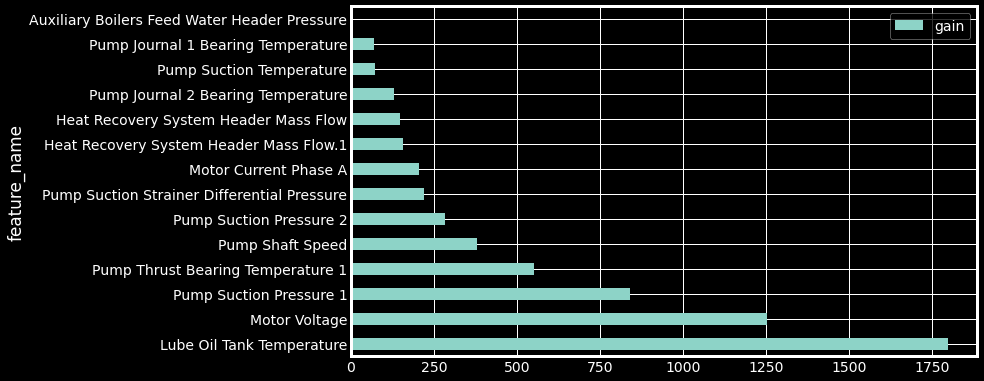

In [120]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [127]:
list(feature_score["feature_name"])[:10]

['Lube Oil Tank Temperature',
 'Motor Voltage',
 'Pump Suction Pressure 1',
 'Pump Thrust Bearing Temperature 1',
 'Pump Shaft Speed',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Motor Current Phase A',
 'Heat Recovery System Header Mass Flow.1',
 'Heat Recovery System Header Mass Flow']

In [128]:
selected_cols = feature_score["feature_name"].values[:10]
selected_cols

array(['Lube Oil Tank Temperature', 'Motor Voltage',
       'Pump Suction Pressure 1', 'Pump Thrust Bearing Temperature 1',
       'Pump Shaft Speed', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Mass Flow'], dtype=object)

# Modelling and tuning on selected columns

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, train_size=0.6, random_state=42)

In [130]:
# using hyperparameter tuning
import xgboost
regressor=xgboost.XGBRegressor(tree_method='hist', objective='reg:squarederror')

In [131]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [132]:
## Hyper Parameter Optimization


n_estimators = [50, 75, 100, 120, 150]
max_depth = [7, 8, 9, 10, 11, 12]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.07,0.1,0.12,0.15]
min_child_weight = [5,6,7,8,9]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [133]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [134]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.07, 0.1, 0.12,
                                                          0.15],
                                        'max_depth': [7, 8, 9, 10, 11, 12],
                                        'min_child_weight': [5, 6, 7, 8, 9],
                                        'n_estimators': [50, 75, 100, 120,
                                                         150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [135]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [137]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=8,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [138]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)